In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# makes inline plots to have better quality
#%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

In [3]:
def read_and_translate_file(path):
    data = pd.read_csv(path)
    columns = ['ts', 'score', 'age', 'gender', 'education', 'studied_ai','passed_sim_tests',
               'p1', 'woc1', 'p2', 'woc2', 'p3', 'woc3', 'p4', 'woc4', 'p5', 'woc5', 'p6', 'woc6',
               'p7', 'woc7', 'p8', 'woc8', 'art1', 'woc_art1', 'art2', 'woc_art2']
    #rename columns 
    data.columns = columns
    
    #wisdom-of-the-crowd columns
    woc_cols = ["woc1", "woc2", "woc3", "woc4", "woc5", 
                "woc6", "woc7", "woc8", "woc_art1", "woc_art2"]
    
    #translate woc answers to float
    for col in woc_cols:
        data[col] = data[col].str.rstrip('%').astype('float') / 100.0
    
    #make score column integer
    data['score'] = data['score'].str[:-5].astype('int')
    
    translation_dict = {"N" : "F",
                        "Muu" : "Other",
                        "Keskharidus" : "High school",
                        "Põhiharidus" : "Elementary school",
                        "Magistrikraad" : "MSc",
                        "Bakalaureusekraad" : "BSc",
                        "Doktorikraad" : "PhD",
                        "Jah" : "yes",
                        "Ei" : "no",
                        "Jah, kindlasti":"Definitely yes",
                        "Kindlasti jah" :"Definitely yes",
                        "Pigem jah":"Probably yes",
                        "Ma ei tea":"I don't know",
                        "Pigem ei" : "Probably no",
                        "Kindlasti mitte" : "Definitely no",
                        "Kindlasti ei" : "Definitely no",
                        "Kindlasti vasakpoolne":"Definitely left one",
                        "Pigem vasakpoolne":"Probably left one",
                        "Pigem parempoolne":"Probably right one",
                        "Kindalsti parempoolne":"Definitely right one",
                        "Kindlasti parempoolne": "Definitely right one",
                        "Kindlasti parampoolne": "Definitely right one"
                        }
    
    #translate answers to English
    for col in columns:
        data[col] = data[col].map(translation_dict).fillna(data[col])
    return data
    

In [4]:
#dictionaries for mapping columns
d1 = {"Probably yes" : 1,
      "Definitely yes": 1,
      "I don't know": 0,
      "Probably no": 0,
      "Definitely no": 0}

d2 = {"Probably yes" : 0,
      "Definitely yes": 0,
      "I don't know": 0,
      "Probably no": 1,
      "Definitely no": 1}

d3 = {"Definitely left one": 1,
      "Probably left one": 1,
      "I don't know": 0,
      "Definitely right one": 0,
      "Probably right one": 0}

d4 = {"Definitely left one": 0,
      "Probably left one": 0,
      "I don't know": 0,
      "Definitely right one": 1,
      "Probably right one": 1}

### images-est-1

In [5]:
data_est = pd.read_csv("data_28.05.20/1-images.csv")

In [6]:
data_est.head(3)

,Timestamp,Score,Teie vanus,Teie sugu,Kõrgeim omandatud haridustase,Kas te olete kunagi õppinud või töötanud tehisintellekti valdkonnas?,Kas olete sarnast testi varem teinud?,"Kas see on päris inimene, mitte tehisvõrgu poolt genereeritud pilt?","Kui paljud seda testi tegevad inimesed teie arvates vastavad, et see oli päris inimene? [Ma ütleks...]","Kas see on päris inimene, mitte tehisvõrgu poolt genereeritud pilt?.1",...,Kumb neist on päris inimene?.1,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].1",Kumb neist on päris inimene?.2,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].2",Kumb neist on päris inimene?.3,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].3",Kas see teos on inimese loodud?,"Kui paljud inimesed teie arvates vastavad, et selle teose on loonud inimene? [Ma ütleks...]",Kas see teos on inimese loodud?.1,"Kui paljud inimesed teie arvates vastavad, et selle teose on loonud inimene? [Ma ütleks...].1"
0,4/17/2020 12:39:56,5 / 10,43,N,BSc,Ei,Ei,Pigem ei,80%,Pigem ei,...,Pigem vasakpoolne,50%,Pigem parempoolne,70%,Pigem parempoolne,70%,Pigem jah,50%,Pigem jah,50%
1,4/17/2020 13:49:56,6 / 10,31,M,MSc,Ei,Ei,Pigem jah,90%,Ma ei tea,...,Pigem vasakpoolne,80%,Pigem vasakpoolne,50%,Pigem parempoolne,50%,Pigem ei,90%,Pigem jah,80%
2,4/17/2020 14:27:17,8 / 10,31,M,MSc,Jah,Jah,Pigem ei,40%,Pigem ei,...,Kindlasti parempoolne,40%,Kindalsti parempoolne,10%,Kindlasti parempoolne,20%,Kindlasti mitte,20%,Pigem jah,60%


In [7]:
data1 = read_and_translate_file("data_28.05.20/1-images.csv")

In [8]:
data1.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,Probably no,0.8,Probably no,...,Probably left one,0.5,Probably right one,0.7,Probably right one,0.7,Probably yes,0.5,Probably yes,0.5
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,Probably yes,0.9,I don't know,...,Probably left one,0.8,Probably left one,0.5,Probably right one,0.5,Probably no,0.9,Probably yes,0.8
2,4/17/2020 14:27:17,8,31,M,MSc,yes,yes,Probably no,0.4,Probably no,...,Definitely right one,0.4,Definitely right one,0.1,Definitely right one,0.2,Definitely no,0.2,Probably yes,0.6
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,Probably no,0.3,Probably yes,...,Probably right one,0.3,Definitely right one,0.8,Probably left one,0.3,Probably no,0.3,Definitely yes,0.6
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,Probably yes,0.7,Probably yes,...,Probably right one,0.6,Probably right one,0.5,I don't know,0.5,I don't know,0.5,Probably yes,0.6


In [9]:
data1.shape

(118, 27)

In [10]:
data1['passed_sim_tests'].value_counts()

no     115
yes      3
Name: passed_sim_tests, dtype: int64

In [11]:
data1 = data1[data1['passed_sim_tests']=='no']

In [12]:
data1.shape

(115, 27)

In [13]:
data1['studied_ai'].value_counts()

no     104
yes     11
Name: studied_ai, dtype: int64

#### Map question columns into 0/1

In [14]:
# map answers to points
df1_mapped = data1.copy()

columns1 = ["p1", "p4", "art2"]
for col in columns1:
    df1_mapped[col] = data1[col].map(d1)
    
columns2 = ["p2", "p3", "art1"]
for col in columns2:
    df1_mapped[col] = data1[col].map(d2)

columns3 = ["p5", "p8"]
for col in columns3:
    df1_mapped[col] = data1[col].map(d3)

columns4 = ["p6", "p7"]
for col in columns4:
    df1_mapped[col] = data1[col].map(d4)

In [15]:
all(df1_mapped.dropna() == df1_mapped)

True

In [16]:
df1_mapped.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,0,0.8,1,...,0,0.5,1,0.7,0,0.7,0,0.5,1,0.5
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,1,0.9,0,...,0,0.8,0,0.5,0,0.5,1,0.9,1,0.8
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,0,0.3,0,...,1,0.3,1,0.8,1,0.3,1,0.3,1,0.6
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,1,0.7,0,...,1,0.6,1,0.5,0,0.5,0,0.5,1,0.6
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,1,0.6,0,...,0,0.4,1,0.4,0,0.6,1,0.4,1,0.6


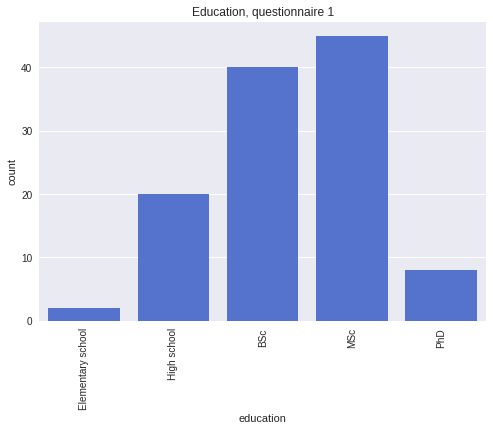

In [17]:
hist = sns.countplot(x = 'education',
              data = df1_mapped,
              order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 1")
plt.show()

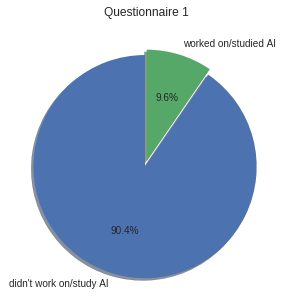

In [18]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df1_mapped['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Questionnaire 1")
plt.show()

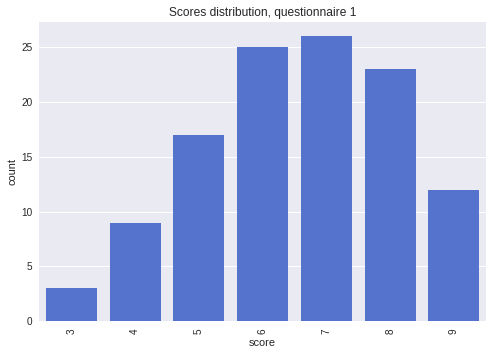

In [19]:
hist = sns.countplot(x = 'score',
              data = df1_mapped,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, questionnaire 1")
plt.show()

In [20]:
people_simple = ["p1", "p2", "p3", "p4"]
people_comparison = ["p5", "p6", "p7", "p8"]
people_cols = people_simple+people_comparison

art_cols = ["art1", "art2"]

In [21]:
df1_mapped['people_simple_sum'] = df1_mapped[people_simple].sum(axis=1)
df1_mapped['people_comparison_sum'] = df1_mapped[people_comparison].sum(axis=1)

people_simple_average = np.round(np.sum(df1_mapped['people_simple_sum'])/df1_mapped.shape[0],2)
people_comparison_average = np.round(np.sum(df1_mapped['people_comparison_sum'])/df1_mapped.shape[0],2)

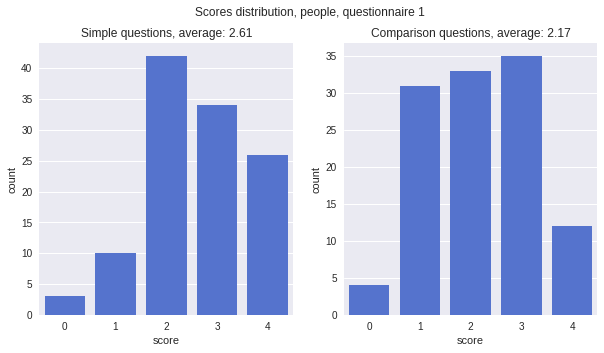

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'people_simple_sum',
                     data = df1_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(people_simple_average))

hist2 = sns.countplot(x = 'people_comparison_sum',
                     data = df1_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(people_comparison_average))

fig.suptitle("Scores distribution, people, questionnaire 1")
plt.show()

In [23]:
questions_average = np.sum(df1_mapped[people_cols+art_cols], axis = 0)/df1_mapped.shape[0]
questions_average = np.round(questions_average*100,2)

In [24]:
questions_average

p1      63.48
p2      44.35
p3      74.78
p4      78.26
p5      69.57
p6      47.83
p7      67.83
p8      32.17
art1    89.57
art2    87.83
dtype: float64

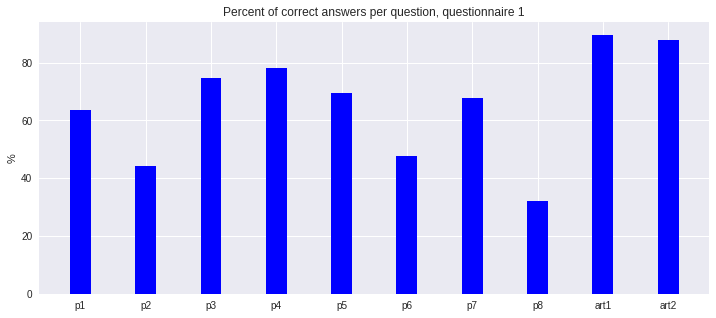

In [25]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind)
ax.set_xticklabels(tuple(people_cols+art_cols))


plt.title("Percent of correct answers per question, questionnaire 1")
plt.show()

### images-est-2

In [26]:
data2_est = pd.read_csv("data_28.05.20/2-images.csv")

In [27]:
data2_est.head()

,Timestamp,Score,Teie vanus,Teie sugu,Kõrgeim omandatud haridustase,Kas te olete kunagi õppinud või töötanud tehisintellekti valdkonnas?,Kas olete sarnast testi varem teinud?,"Kas see on päris inimene, mitte tehisvõrgu poolt genereeritud pilt?","Kui paljud seda testi tegevad inimesed teie arvates vastavad, et see oli päris inimene? [Ma ütleks...]","Kas see on päris inimene, mitte tehisvõrgu poolt genereeritud pilt?.1",...,Kumb neist on päris inimene?.1,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].1",Kumb neist on päris inimene?.2,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].2",Kumb neist on päris inimene?.3,"Kui paljud inimesed teie arvates vastavad, et vasakpoolsel pildil oli päris inimene ja parempoolne pilt oli tehisintellekti poolt loodud? [Ma ütleks...].3",Kas see teos on inimese loodud?,"Kui paljud inimesed teie arvates vastavad, et selle teose on loonud inimene? [Ma ütleks...]",Kas see teos on inimese loodud?.1,"Kui paljud inimesed teie arvates vastavad, et selle teose on loonud inimene? [Ma ütleks...].1"
0,4/18/2020 13:32:46,9 / 10,30,M,Magistrikraad,Ei,Ei,Pigem jah,70%,Pigem ei,...,Pigem vasakpoolne,50%,Kindlasti parempoolne,30%,Kindlasti vasakpoolne,60%,Pigem ei,40%,Pigem jah,50%
1,4/20/2020 10:03:38,8 / 10,28,M,Magistrikraad,Ei,Ei,Pigem jah,80%,Pigem ei,...,Pigem parempoolne,40%,Pigem parempoolne,40%,Pigem vasakpoolne,70%,Pigem ei,30%,Pigem jah,60%
2,4/20/2020 11:12:15,8 / 10,30,M,Doktorikraad,Ei,Ei,"Jah, kindlasti",100%,Pigem jah,...,Pigem vasakpoolne,70%,Pigem parempoolne,50%,Pigem vasakpoolne,60%,Pigem ei,50%,Pigem jah,50%
3,4/20/2020 11:23:03,8 / 10,28,N,Bakalaureusekraad,Ei,Ei,Pigem jah,80%,Pigem ei,...,Pigem vasakpoolne,40%,Pigem parempoolne,30%,Kindlasti vasakpoolne,70%,Pigem ei,50%,Pigem jah,50%
4,4/20/2020 18:17:23,8 / 10,30,M,Magistrikraad,Ei,Ei,Pigem ei,30%,Pigem ei,...,Pigem vasakpoolne,70%,Pigem parempoolne,40%,Pigem vasakpoolne,50%,Pigem ei,20%,Pigem ei,30%


In [28]:
data2 = read_and_translate_file("data_28.05.20/2-images.csv")

In [29]:
data2.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/18/2020 13:32:46,9,30,M,MSc,no,no,Probably yes,0.7,Probably no,...,Probably left one,0.5,Definitely right one,0.3,Definitely left one,0.6,Probably no,0.4,Probably yes,0.5
1,4/20/2020 10:03:38,8,28,M,MSc,no,no,Probably yes,0.8,Probably no,...,Probably right one,0.4,Probably right one,0.4,Probably left one,0.7,Probably no,0.3,Probably yes,0.6
2,4/20/2020 11:12:15,8,30,M,PhD,no,no,Definitely yes,1.0,Probably yes,...,Probably left one,0.7,Probably right one,0.5,Probably left one,0.6,Probably no,0.5,Probably yes,0.5
3,4/20/2020 11:23:03,8,28,F,BSc,no,no,Probably yes,0.8,Probably no,...,Probably left one,0.4,Probably right one,0.3,Definitely left one,0.7,Probably no,0.5,Probably yes,0.5
4,4/20/2020 18:17:23,8,30,M,MSc,no,no,Probably no,0.3,Probably no,...,Probably left one,0.7,Probably right one,0.4,Probably left one,0.5,Probably no,0.2,Probably no,0.3


In [30]:
data2.shape

(104, 27)

In [31]:
data2.dropna().shape

(104, 27)

In [32]:
data2['passed_sim_tests'].value_counts()

no     103
yes      1
Name: passed_sim_tests, dtype: int64

In [33]:
data2 = data2[data2['passed_sim_tests']=='no']

In [34]:
data2.shape

(103, 27)

In [35]:
data2['studied_ai'].value_counts()

no     93
yes    10
Name: studied_ai, dtype: int64

In [36]:
# map answers to points

df2_mapped = data2.copy()

columns1 = ["p1", "p3", "art2"]
for col in columns1:
    df2_mapped[col] = data2[col].map(d1)
    
columns2 = ["p2", "p4", "art1"]
for col in columns2:
    df2_mapped[col] = data2[col].map(d2)

columns3 = ["p5", "p6", "p8"]
for col in columns3:
    df2_mapped[col] = data2[col].map(d3)

columns4 = ["p7"]
for col in columns4:
    df2_mapped[col] = data2[col].map(d4)

In [37]:
all(df2_mapped.dropna() == df2_mapped)
#df2_mapped[df2_mapped.isnull().any(axis=1)]

True

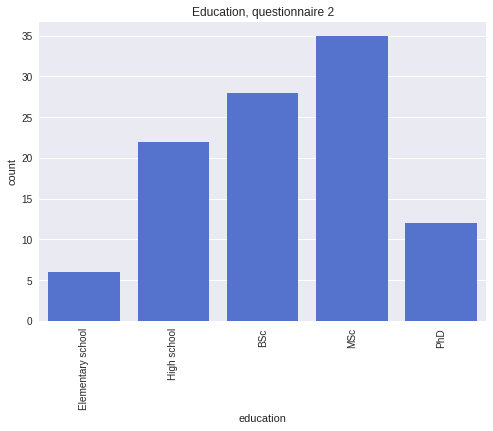

In [38]:
hist = sns.countplot(x = 'education',
              data = df2_mapped,
              order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 2")
plt.show()

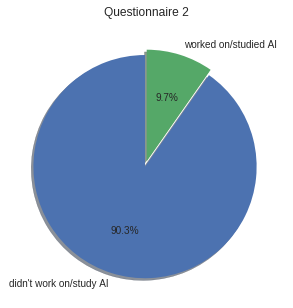

In [39]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df2_mapped['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Questionnaire 2")
plt.show()

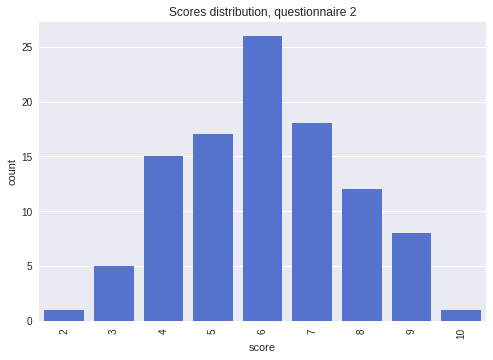

In [40]:
hist = sns.countplot(x = 'score',
              data = df2_mapped,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, questionnaire 2")
plt.show()

In [41]:
df2_mapped['people_simple_sum'] = df2_mapped[people_simple].sum(axis=1)
df2_mapped['people_comparison_sum'] = df2_mapped[people_comparison].sum(axis=1)

people_simple_average = np.round(np.sum(df2_mapped['people_simple_sum'])/df2_mapped.shape[0],2)
people_comparison_average = np.round(np.sum(df2_mapped['people_comparison_sum'])/df2_mapped.shape[0],2)

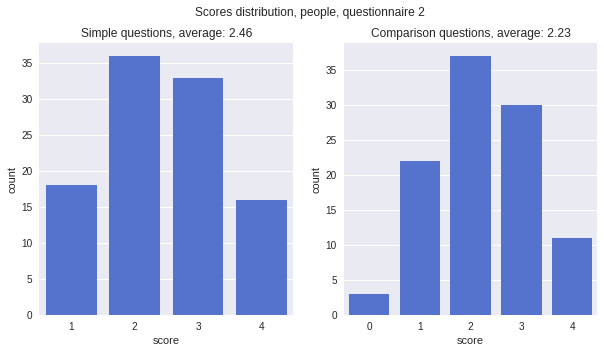

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'people_simple_sum',
                     data = df2_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(people_simple_average))

hist2 = sns.countplot(x = 'people_comparison_sum',
                     data = df2_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(people_comparison_average))

fig.suptitle("Scores distribution, people, questionnaire 2")
plt.show()

In [43]:
questions_average = np.sum(df2_mapped[people_cols+art_cols], axis = 0)/df2_mapped.shape[0]
questions_average = np.round(questions_average*100,2)

In [44]:
questions_average

p1      63.11
p2      58.25
p3      66.99
p4      57.28
p5      33.01
p6      68.93
p7      54.37
p8      66.99
art1    63.11
art2    71.84
dtype: float64

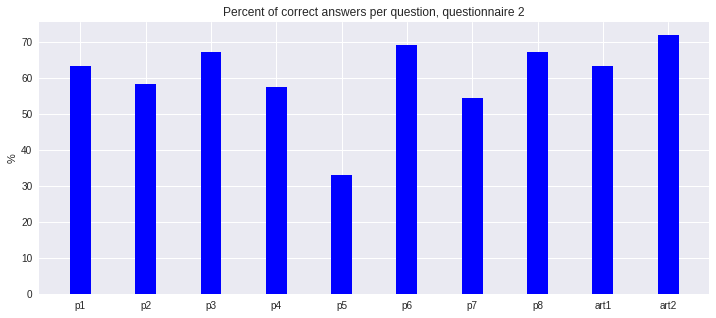

In [45]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind)
ax.set_xticklabels(tuple(people_cols+art_cols))


plt.title("Percent of correct answers per question, questionnaire 2")
plt.show()

### images-est-3

In [46]:
data3 = read_and_translate_file("data_28.05.20/3-images.csv")

In [47]:
data3.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/20/2020 17:39:51,7,19,M,High school,no,no,Probably yes,0.6,Probably yes,...,Probably right one,0.7,Probably right one,0.8,Probably left one,0.4,Probably yes,0.6,Definitely no,0.8
1,4/21/2020 0:57:57,7,23,M,BSc,no,no,Probably yes,0.8,Probably yes,...,Probably right one,0.3,Probably right one,0.5,Definitely right one,0.2,Probably yes,0.5,Probably no,0.3
2,4/21/2020 9:37:26,7,53,M,MSc,no,no,Probably no,0.7,Probably no,...,Probably left one,0.8,Probably right one,0.8,Probably left one,0.8,Probably yes,0.7,Probably no,0.8
3,4/21/2020 23:56:06,7,42,F,BSc,no,no,Probably no,0.9,Probably yes,...,Definitely left one,0.8,Probably right one,0.6,Probably left one,0.6,Probably no,0.5,Probably no,0.6
4,4/22/2020 17:13:25,5,32,M,MSc,no,no,Probably no,0.7,Definitely no,...,Definitely right one,0.3,I don't know,0.5,Definitely left one,0.6,Definitely yes,0.8,Definitely no,0.2


In [48]:
data3.shape

(113, 27)

In [49]:
data3.dropna().shape

(113, 27)

In [50]:
data3['passed_sim_tests'].value_counts()

no     109
yes      4
Name: passed_sim_tests, dtype: int64

In [51]:
data3 = data3[data3['passed_sim_tests']=='no']

In [52]:
data3.shape

(109, 27)

In [53]:
data3['studied_ai'].value_counts()

no     106
yes      3
Name: studied_ai, dtype: int64

In [54]:
# map answers to points
df3_mapped = data3.copy()

columns1 = ["p2", "p3", "art1"]
for col in columns1:
    df3_mapped[col] = data3[col].map(d1)
    
columns2 = ["p1", "p4", "art2"]
for col in columns2:
    df3_mapped[col] = data3[col].map(d2)

columns3 = ["p5", "p6"]
for col in columns3:
    df3_mapped[col] = data3[col].map(d3)

columns4 = ["p7", "p8"]
for col in columns4:
    df3_mapped[col] = data3[col].map(d4)

In [55]:
all(df3_mapped.dropna() == df3_mapped)
#df3_mapped[df3_mapped.isnull().any(axis=1)]

True

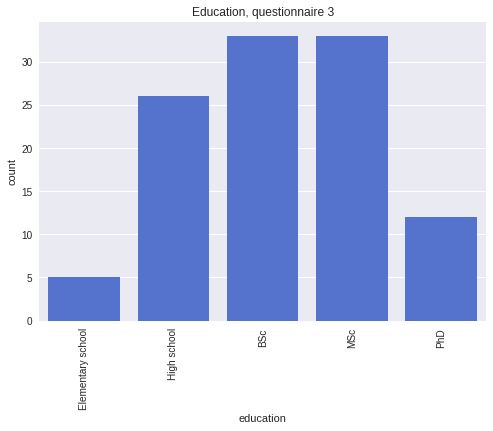

In [56]:
hist = sns.countplot(x = 'education',
              data = df3_mapped,
              order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 3")
plt.show()

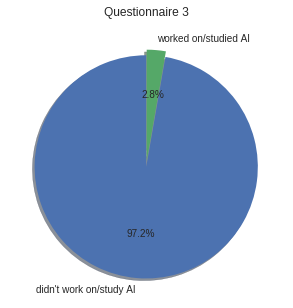

In [57]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df3_mapped['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Questionnaire 3")
plt.show()

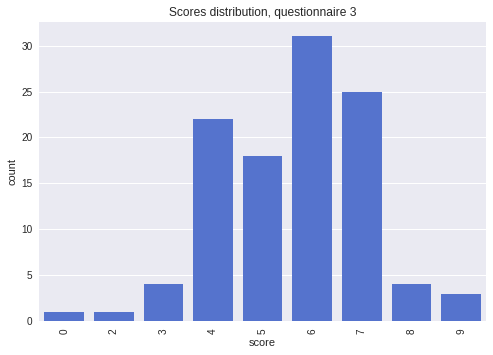

In [58]:
hist = sns.countplot(x = 'score',
              data = df3_mapped,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, questionnaire 3")
plt.show()

In [59]:
df3_mapped['people_simple_sum'] = df3_mapped[people_simple].sum(axis=1)
df3_mapped['people_comparison_sum'] = df3_mapped[people_comparison].sum(axis=1)

people_simple_average = np.round(np.sum(df3_mapped['people_simple_sum'])/df3_mapped.shape[0],2)
people_comparison_average = np.round(np.sum(df3_mapped['people_comparison_sum'])/df3_mapped.shape[0],2)

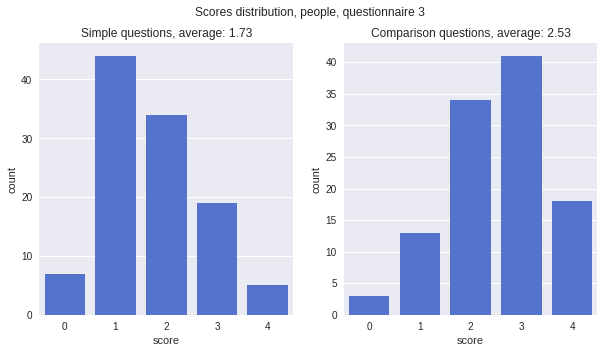

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'people_simple_sum',
                     data = df3_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(people_simple_average))

hist2 = sns.countplot(x = 'people_comparison_sum',
                     data = df3_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(people_comparison_average))

fig.suptitle("Scores distribution, people, questionnaire 3")
plt.show()

In [61]:
questions_average = np.sum(df3_mapped[people_cols+art_cols], axis = 0)/df3_mapped.shape[0]
questions_average = np.round(questions_average*100,2)

In [62]:
questions_average

p1      55.05
p2      44.04
p3      23.85
p4      50.46
p5      83.49
p6      43.12
p7      66.06
p8      60.55
art1    58.72
art2    76.15
dtype: float64

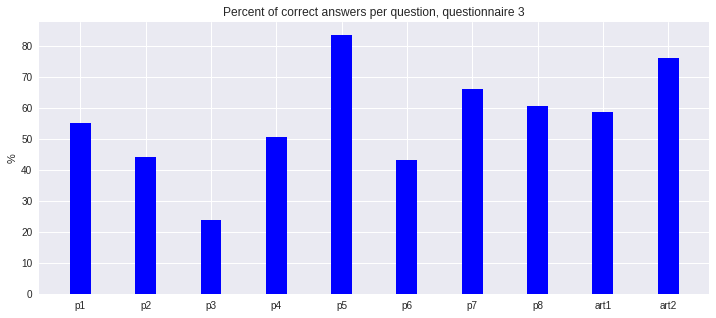

In [63]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind)
ax.set_xticklabels(tuple(people_cols+art_cols))


plt.title("Percent of correct answers per question, questionnaire 3")
plt.show()

### image-est-4

In [64]:
data4 = read_and_translate_file("data_28.05.20/4-images.csv")

In [65]:
data4.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/20/2020 12:12:18,7,22,F,BSc,no,no,Probably no,0.4,Probably no,...,Probably right one,0.7,Probably right one,0.5,Probably left one,0.8,Probably no,0.3,Probably no,0.2
1,4/20/2020 14:15:18,8,33,M,MSc,no,no,Probably yes,0.7,Probably yes,...,Probably right one,0.6,Probably right one,0.5,Probably left one,0.7,Probably yes,0.5,Probably no,0.6
2,4/20/2020 14:30:29,6,22,M,Elementary school,no,no,Probably no,0.5,Definitely no,...,Definitely right one,0.7,Definitely right one,0.3,Definitely right one,0.4,Definitely yes,0.5,Definitely no,0.5
3,4/20/2020 14:37:11,5,29,M,PhD,no,no,Definitely no,0.1,Probably no,...,Probably right one,0.6,Probably right one,0.4,Definitely left one,0.6,Probably no,0.7,Definitely no,0.1
4,4/20/2020 15:46:34,6,34,F,PhD,no,no,Probably yes,0.7,Probably no,...,Probably left one,0.5,Probably left one,0.6,Definitely left one,0.8,Probably yes,0.7,Definitely no,0.0


In [66]:
data4.shape

(112, 27)

In [67]:
data4.dropna().shape

(112, 27)

In [68]:
data4['passed_sim_tests'].value_counts()

no     109
yes      3
Name: passed_sim_tests, dtype: int64

In [69]:
data4 = data4[data4['passed_sim_tests']=='no']

In [70]:
data4.shape

(109, 27)

In [71]:
data4['studied_ai'].value_counts()

no     103
yes      6
Name: studied_ai, dtype: int64

In [72]:
# map answers to points
df4_mapped = data4.copy()

columns1 = ["p1", "p3", "art1"]
for col in columns1:
    df4_mapped[col] = data4[col].map(d1)
    
columns2 = ["p2", "p4", "art2"]
for col in columns2:
    df4_mapped[col] = data4[col].map(d2)

columns3 = ["p5", "p8"]
for col in columns3:
    df4_mapped[col] = data4[col].map(d3)

columns4 = ["p6", "p7"]
for col in columns4:
    df4_mapped[col] = data4[col].map(d4)

In [73]:
all(df4_mapped.dropna() == df4_mapped)
#df3_mapped[df3_mapped.isnull().any(axis=1)]

True

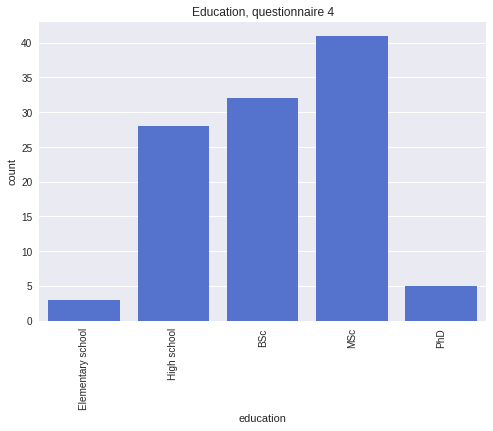

In [74]:
hist = sns.countplot(x = 'education',
              data = df4_mapped,
              order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 4")
plt.show()

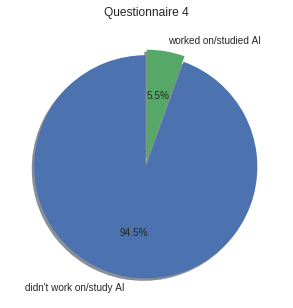

In [75]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df4_mapped['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Questionnaire 4")
plt.show()

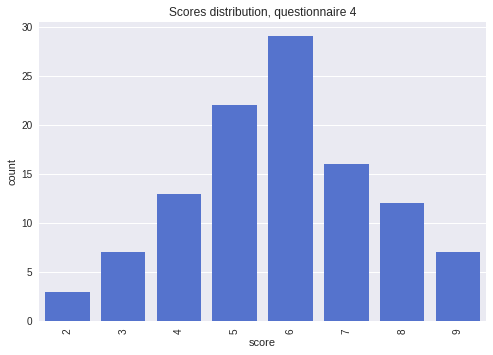

In [76]:
hist = sns.countplot(x = 'score',
              data = df4_mapped,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, questionnaire 4")
plt.show()

In [77]:
df4_mapped['people_simple_sum'] = df4_mapped[people_simple].sum(axis=1)
df4_mapped['people_comparison_sum'] = df4_mapped[people_comparison].sum(axis=1)

people_simple_average = np.round(np.sum(df4_mapped['people_simple_sum'])/df4_mapped.shape[0],2)
people_comparison_average = np.round(np.sum(df4_mapped['people_comparison_sum'])/df4_mapped.shape[0],2)

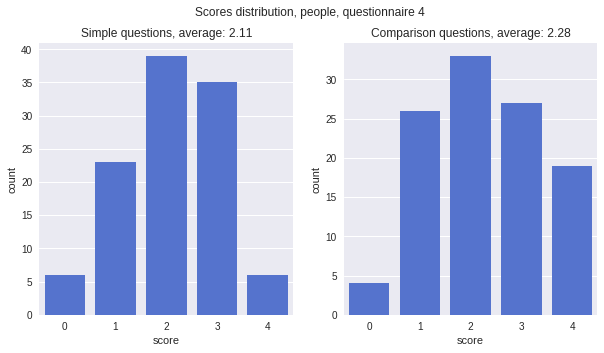

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'people_simple_sum',
                     data = df4_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(people_simple_average))

hist2 = sns.countplot(x = 'people_comparison_sum',
                     data = df4_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(people_comparison_average))

fig.suptitle("Scores distribution, people, questionnaire 4")
plt.show()

In [79]:
questions_average = np.sum(df4_mapped[people_cols+art_cols], axis = 0)/df4_mapped.shape[0]
questions_average = np.round(questions_average*100,2)

In [80]:
questions_average

p1      51.38
p2      65.14
p3      46.79
p4      47.71
p5      42.20
p6      55.96
p7      66.06
p8      64.22
art1    56.88
art2    85.32
dtype: float64

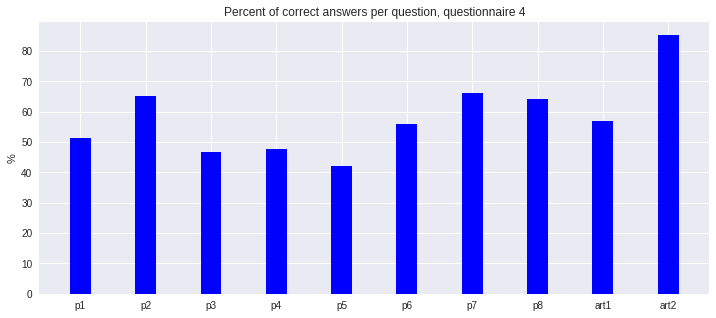

In [81]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind)
ax.set_xticklabels(tuple(people_cols+art_cols))


plt.title("Percent of correct answers per question, questionnaire 4")
plt.show()

### join and save dataframes

In [82]:
data1.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p6,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,Probably no,0.8,Probably no,...,Probably left one,0.5,Probably right one,0.7,Probably right one,0.7,Probably yes,0.5,Probably yes,0.5
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,Probably yes,0.9,I don't know,...,Probably left one,0.8,Probably left one,0.5,Probably right one,0.5,Probably no,0.9,Probably yes,0.8
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,Probably no,0.3,Probably yes,...,Probably right one,0.3,Definitely right one,0.8,Probably left one,0.3,Probably no,0.3,Definitely yes,0.6
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,Probably yes,0.7,Probably yes,...,Probably right one,0.6,Probably right one,0.5,I don't know,0.5,I don't know,0.5,Probably yes,0.6
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,Probably yes,0.6,Probably yes,...,Probably left one,0.4,Probably right one,0.4,Probably right one,0.6,Probably no,0.4,Probably yes,0.6


In [83]:
df1_mapped.head()

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2,people_simple_sum,people_comparison_sum
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,0,0.8,1,...,1,0.7,0,0.7,0,0.5,1,0.5,2,2
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,1,0.9,0,...,0,0.5,0,0.5,1,0.9,1,0.8,3,1
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,0,0.3,0,...,1,0.8,1,0.3,1,0.3,1,0.6,0,4
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,1,0.7,0,...,1,0.5,0,0.5,0,0.5,1,0.6,3,2
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,1,0.6,0,...,1,0.4,0,0.6,1,0.4,1,0.6,2,1


In [84]:
#add identifier column
data1['questionnaire_id'] = [1]*data1.shape[0]
data2['questionnaire_id'] = [2]*data2.shape[0]
data3['questionnaire_id'] = [3]*data3.shape[0]
data4['questionnaire_id'] = [4]*data4.shape[0]

In [85]:
#add identifier column
df1_mapped['questionnaire_id'] = [1]*df1_mapped.shape[0]
df2_mapped['questionnaire_id'] = [1]*df2_mapped.shape[0]
df3_mapped['questionnaire_id'] = [1]*df3_mapped.shape[0]
df4_mapped['questionnaire_id'] = [1]*df4_mapped.shape[0]

In [86]:
data_joined = data1.append(data2)
data_joined = data_joined.append(data3)
data_joined = data_joined.append(data4)

In [87]:
data_joined

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,woc6,p7,woc7,p8,woc8,art1,woc_art1,art2,woc_art2,questionnaire_id
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,Probably no,0.8,Probably no,...,0.5,Probably right one,0.7,Probably right one,0.7,Probably yes,0.5,Probably yes,0.5,1
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,Probably yes,0.9,I don't know,...,0.8,Probably left one,0.5,Probably right one,0.5,Probably no,0.9,Probably yes,0.8,1
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,Probably no,0.3,Probably yes,...,0.3,Definitely right one,0.8,Probably left one,0.3,Probably no,0.3,Definitely yes,0.6,1
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,Probably yes,0.7,Probably yes,...,0.6,Probably right one,0.5,I don't know,0.5,I don't know,0.5,Probably yes,0.6,1
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,Probably yes,0.6,Probably yes,...,0.4,Probably right one,0.4,Probably right one,0.6,Probably no,0.4,Probably yes,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/17/2020 22:52:44,3,34,F,MSc,no,no,I don't know,0.7,Probably no,...,0.6,Probably right one,0.5,Probably left one,0.6,Probably no,0.4,I don't know,0.3,4
108,5/19/2020 0:02:00,6,23,F,BSc,no,no,Probably no,0.5,Definitely no,...,0.8,Definitely left one,0.5,Definitely left one,0.8,Probably yes,0.6,Definitely no,0.2,4
109,5/26/2020 0:38:29,3,31,M,BSc,no,no,Definitely no,0.1,Probably yes,...,0.7,Probably left one,0.6,Definitely left one,0.8,Probably no,0.3,Probably no,0.5,4
110,5/26/2020 12:50:09,6,35,M,BSc,no,no,Probably no,0.6,Probably no,...,0.5,Probably right one,0.4,I don't know,0.5,Probably yes,0.5,Probably yes,0.4,4


In [88]:
data1.shape[0] + data2.shape[0] + data3.shape[0] + data4.shape[0]

436

In [89]:
df_mapped_joined = df1_mapped.append(df2_mapped)
df_mapped_joined = df_mapped_joined.append(df3_mapped)
df_mapped_joined = df_mapped_joined.append(df4_mapped)

In [90]:
df_mapped_joined

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,woc7,p8,woc8,art1,woc_art1,art2,woc_art2,people_simple_sum,people_comparison_sum,questionnaire_id
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,0,0.8,1,...,0.7,0,0.7,0,0.5,1,0.5,2,2,1
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,1,0.9,0,...,0.5,0,0.5,1,0.9,1,0.8,3,1,1
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,0,0.3,0,...,0.8,1,0.3,1,0.3,1,0.6,0,4,1
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,1,0.7,0,...,0.5,0,0.5,0,0.5,1,0.6,3,2,1
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,1,0.6,0,...,0.4,0,0.6,1,0.4,1,0.6,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/17/2020 22:52:44,3,34,F,MSc,no,no,0,0.7,1,...,0.5,1,0.6,0,0.4,0,0.3,1,2,1
108,5/19/2020 0:02:00,6,23,F,BSc,no,no,0,0.5,1,...,0.5,1,0.8,1,0.6,1,0.2,3,1,1
109,5/26/2020 0:38:29,3,31,M,BSc,no,no,0,0.1,0,...,0.6,1,0.8,0,0.3,1,0.5,1,1,1
110,5/26/2020 12:50:09,6,35,M,BSc,no,no,0,0.6,1,...,0.4,0,0.5,1,0.5,0,0.4,2,3,1


In [91]:
data_joined.to_pickle("data_translated_joined.pickle")

In [92]:
df_mapped_joined.to_pickle("df_mapped_joined.pickle")